In [49]:
import pandas as pd
from sklearn.impute import SimpleImputer

train_data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X, y = train_data.drop(columns=["Survived","Name","PassengerId","Ticket","Cabin"]), train_data["Survived"]
test = test.drop(columns=["Name","PassengerId","Ticket","Cabin"])

# encode Sex and Embarked
for index, row in X.iterrows():
    if row["Sex"] == "male":
        X.loc[index,"Sex"] = 0
    else:
        X.loc[index,"Sex"] = 1
    if row["Embarked"] == "C":
        X.loc[index,"Embarked"] = 0
    elif row["Embarked"] == "Q":
        X.loc[index,"Embarked"] = 1
    else:
        X.loc[index,"Embarked"] = 2

for index, row in test.iterrows():
    if row["Sex"] == "male":
        test.loc[index,"Sex"] = 0
    else:
        test.loc[index,"Sex"] = 1
    if row["Embarked"] == "C":
        test.loc[index,"Embarked"] = 0
    elif row["Embarked"] == "Q":
        test.loc[index,"Embarked"] = 1
    else:
        test.loc[index,"Embarked"] = 2
        
# dealing with NaN values
X = X.interpolate()
test = test.interpolate()

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,2
1,1,1,38.0,1,0,71.2833,0
2,3,1,26.0,0,0,7.9250,2
3,1,1,35.0,1,0,53.1000,2
4,3,0,35.0,0,0,8.0500,2


Data info:

Pclass = socioeconomic class (1: upper, 2: middle, 3: lower)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X_train,X_test,y_train,y_test = train_test_split(X,y)

for i in range(len(names)):
    clf = classifiers[i].fit(X_train,y_train)
    print(f"{names[i]} score: {clf.score(X_test,y_test)}")

Nearest Neighbors score: 0.6816143497757847
Linear SVM score: 0.7982062780269058
RBF SVM score: 0.5829596412556054
Gaussian Process score: 0.7982062780269058
Decision Tree score: 0.8071748878923767
Random Forest score: 0.7982062780269058
Neural Net score: 0.8026905829596412
AdaBoost score: 0.8026905829596412
Naive Bayes score: 0.7982062780269058
QDA score: 0.7982062780269058


In [72]:
best_clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1).fit(X,y)
pred = best_clf.predict(test)
write(pred)

In [57]:
def write(pred):
    f = open("submissions.csv", "w")
    f.write("PassengerId,Survived\n")
    for i in range(892,1310):
        f.write(f"{i},{pred[i-892]}\n")
    f.close()

In [58]:
from sklearn.linear_model import LogisticRegression
# logistic regression
log_clf = LogisticRegression()
log_clf.fit(X,y)
pred = log_clf.predict(test)
write(pred)

C:\Users\rshni\anaconda3\envs\tf2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


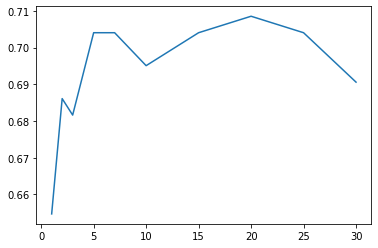

In [68]:
# nearest neighbors
scores = []
n = [1,2,3,5,7,10,15,20,25,30]
for k in n:
    clf = KNeighborsClassifier(k).fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(n,scores)